In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", message="When grouping with a length-1 list-like")


In [3]:
data=pd.read_csv("/kaggle/input/task-1/Fraud.csv")

In [4]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
data.shape

(6362620, 11)

In [6]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [7]:
data.dropna(inplace=True)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [9]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [10]:
data.duplicated().sum()

0

In [11]:
data=data.drop(columns=["nameOrig","nameDest","isFlaggedFraud"])

In [12]:
data[["isFraud"]]=data[["isFraud"]].astype(int)

In [13]:
data

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,170136.00,160296.36,0.00,0.00,0
1,1,PAYMENT,1864.28,21249.00,19384.72,0.00,0.00,0
2,1,TRANSFER,181.00,181.00,0.00,0.00,0.00,1
3,1,CASH_OUT,181.00,181.00,0.00,21182.00,0.00,1
4,1,PAYMENT,11668.14,41554.00,29885.86,0.00,0.00,0
...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,339682.13,0.00,0.00,339682.13,1
6362616,743,TRANSFER,6311409.28,6311409.28,0.00,0.00,0.00,1
6362617,743,CASH_OUT,6311409.28,6311409.28,0.00,68488.84,6379898.11,1
6362618,743,TRANSFER,850002.52,850002.52,0.00,0.00,0.00,1


In [14]:
data['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

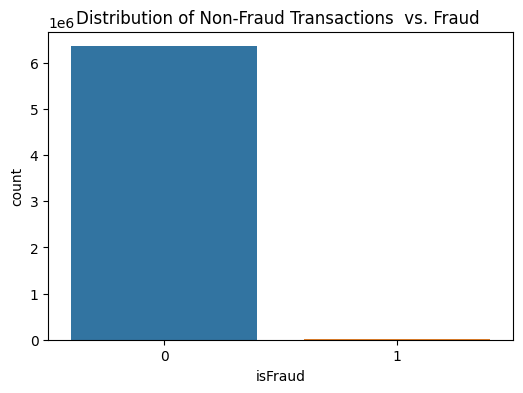

In [15]:
plt.figure(figsize=(6, 4))
sns.countplot(x='isFraud', data=data)
plt.title('Distribution of Non-Fraud Transactions  vs. Fraud ')
plt.show()

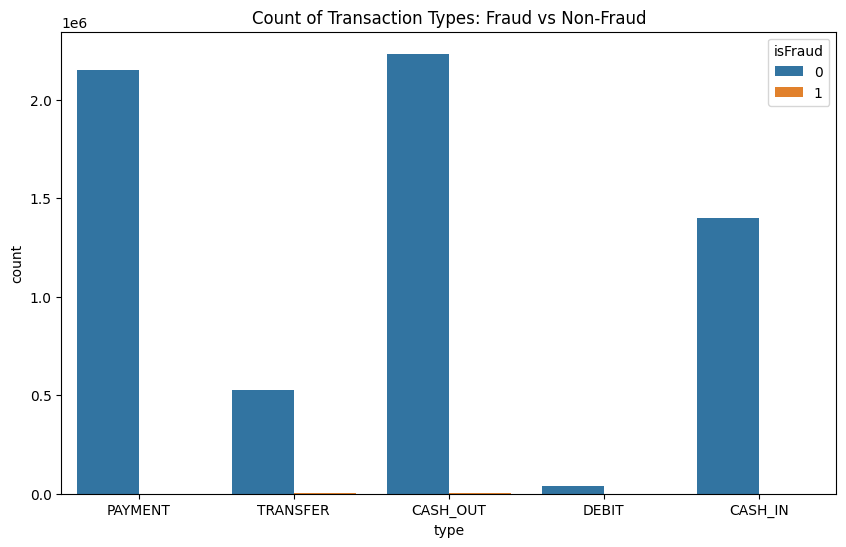

In [16]:
plt.figure(figsize=(10, 6))
sns.countplot(x='type', data=data, hue='isFraud')
plt.title('Count of Transaction Types: Fraud vs Non-Fraud')
plt.show()

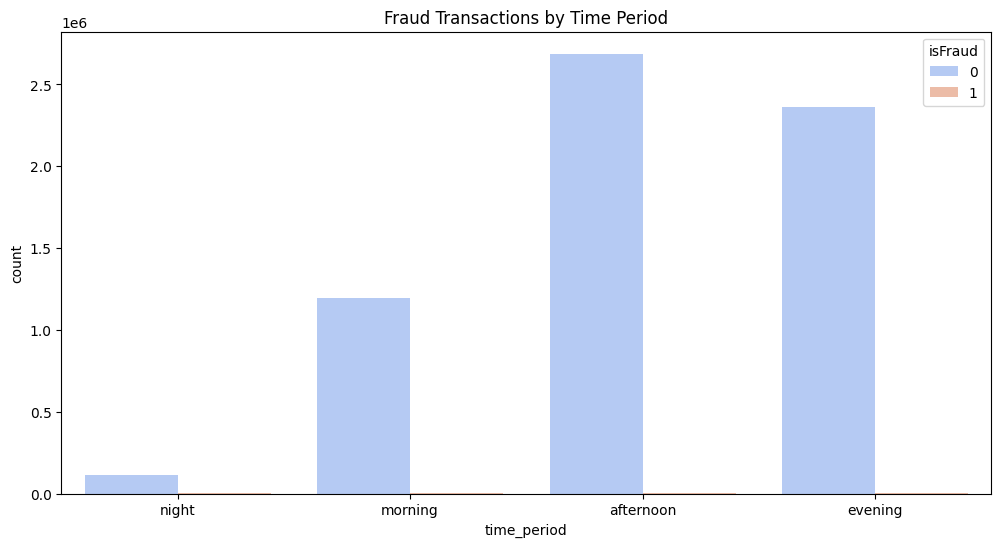

In [17]:
# Assuming step is in hours, you can group hours into periods of the day
def get_time_period(step):
    hour = step % 24
    if 6 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 18:
        return 'afternoon'
    elif 18 <= hour < 24:
        return 'evening'
    else:
        return 'night'

# Create a new column for time periods
data['time_period'] = data['step'].apply(get_time_period)

# Visualize fraud distribution across time periods
plt.figure(figsize=(12, 6))
sns.countplot(x='time_period', hue='isFraud', data=data, palette='coolwarm')
plt.title('Fraud Transactions by Time Period')
plt.show()



In [18]:
data.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,time_period
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,night
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,night
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,night
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,night
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,night


In [19]:
data.drop(columns=['step'], inplace=True)

In [20]:
data = pd.get_dummies(data, columns=['type','time_period'], drop_first=True, dtype=int)

In [21]:
data

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,time_period_evening,time_period_morning,time_period_night
0,9839.64,170136.00,160296.36,0.00,0.00,0,0,0,1,0,0,0,1
1,1864.28,21249.00,19384.72,0.00,0.00,0,0,0,1,0,0,0,1
2,181.00,181.00,0.00,0.00,0.00,1,0,0,0,1,0,0,1
3,181.00,181.00,0.00,21182.00,0.00,1,1,0,0,0,0,0,1
4,11668.14,41554.00,29885.86,0.00,0.00,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,339682.13,339682.13,0.00,0.00,339682.13,1,1,0,0,0,1,0,0
6362616,6311409.28,6311409.28,0.00,0.00,0.00,1,0,0,0,1,1,0,0
6362617,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,1,0,0,0,1,0,0
6362618,850002.52,850002.52,0.00,0.00,0.00,1,0,0,0,1,1,0,0


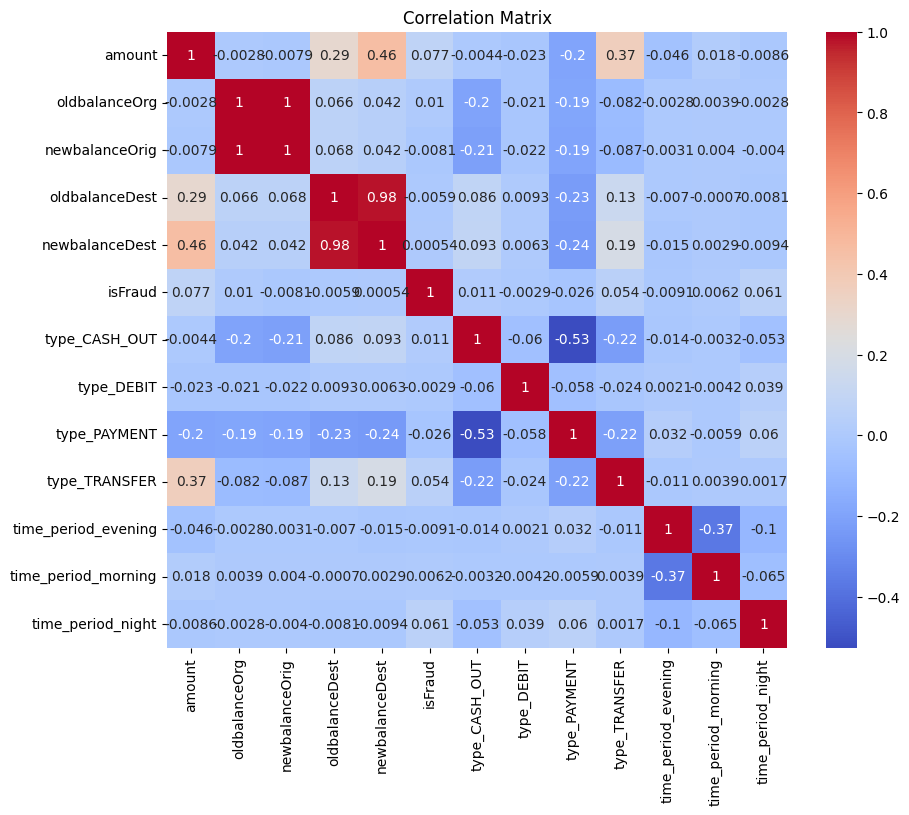

In [22]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [23]:
# Creating balance ratio for original account (orig)
data['balance_ratio_orig'] = np.where(
    data['newbalanceOrig'] != 0,  # Avoid division by zero
    data['oldbalanceOrg'] / data['newbalanceOrig'],
    0  # Assign 0 if newbalanceOrig is zero
)

# Creating balance ratio for destination account (dest)
data['balance_ratio_dest'] = np.where(
    data['newbalanceDest'] != 0,  # Avoid division by zero
    data['oldbalanceDest'] / data['newbalanceDest'],
    0  # Assign 0 if newbalanceDest is zero
)

# Check the new features
data[['balance_ratio_orig', 'balance_ratio_dest']].head()


,balance_ratio_orig,balance_ratio_dest
0,1.061384,0.0
1,1.096173,0.0
2,0.000000,0.0
3,0.000000,0.0
4,1.390423,0.0


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


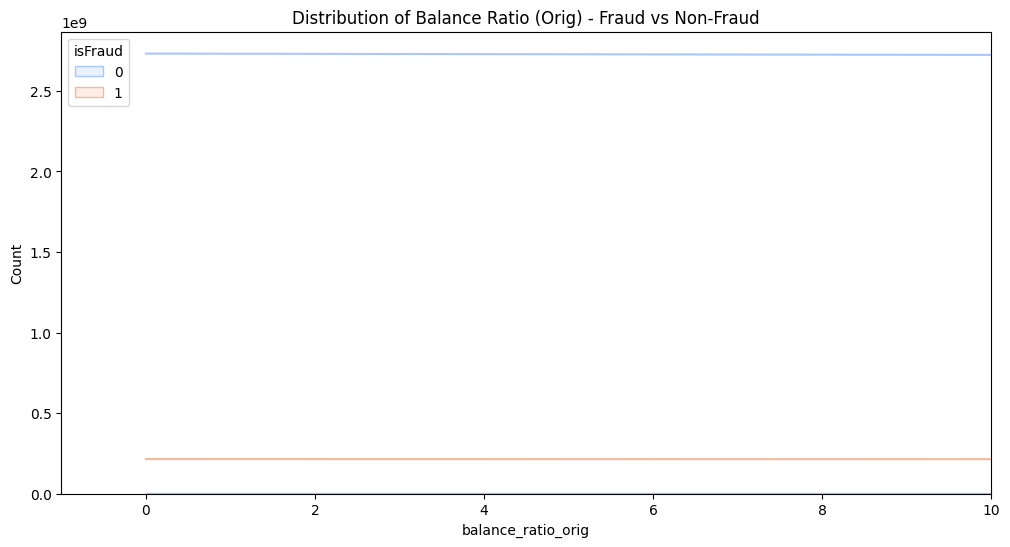

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


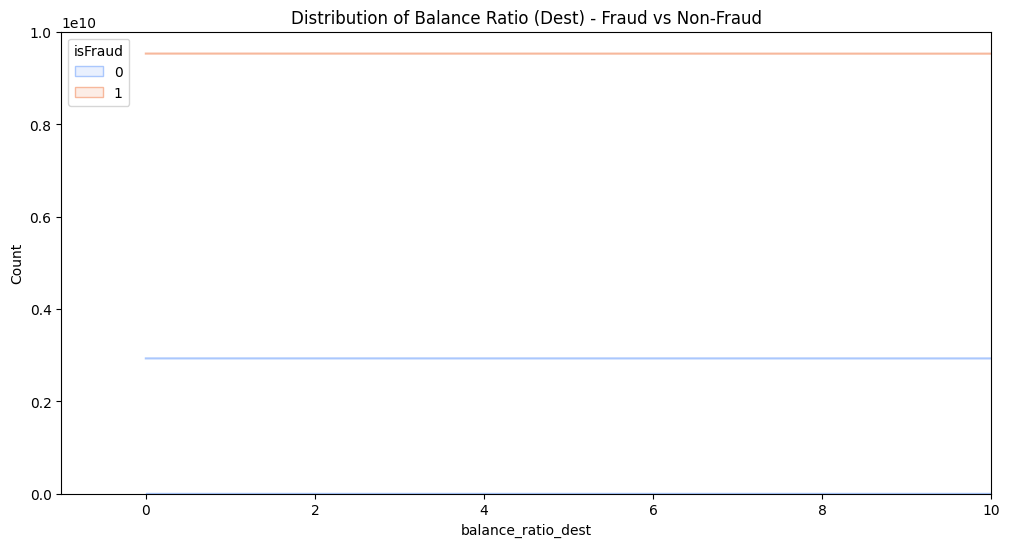

In [24]:
# Visualizing the distribution of balance_ratio_orig
plt.figure(figsize=(12, 6))
sns.histplot(data=data, x='balance_ratio_orig', bins=50, kde=True, hue='isFraud', element='step', palette='coolwarm')
plt.title('Distribution of Balance Ratio (Orig) - Fraud vs Non-Fraud')
plt.xlim(-1, 10)  # Limiting for better visualization
plt.show()

# Visualizing the distribution of balance_ratio_dest
plt.figure(figsize=(12, 6))
sns.histplot(data=data, x='balance_ratio_dest', bins=50, kde=True, hue='isFraud', element='step', palette='coolwarm')
plt.title('Distribution of Balance Ratio (Dest) - Fraud vs Non-Fraud')
plt.xlim(-1, 10)  # Limiting for better visualization
plt.show()


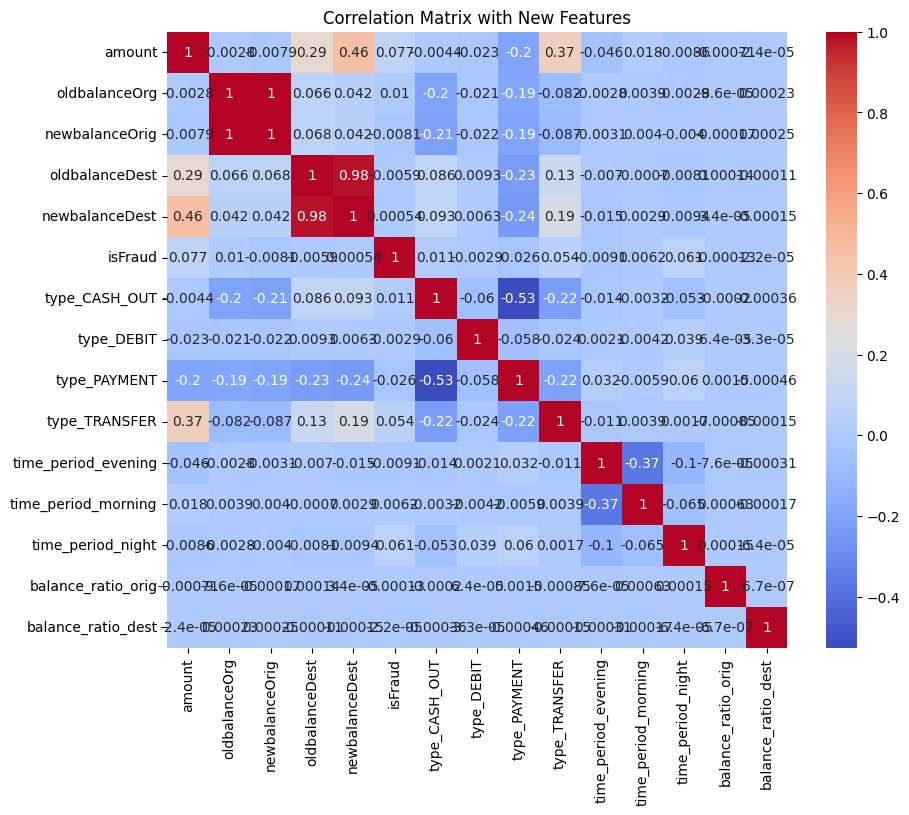

In [25]:
# Adding the new features to the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix with New Features')
plt.show()


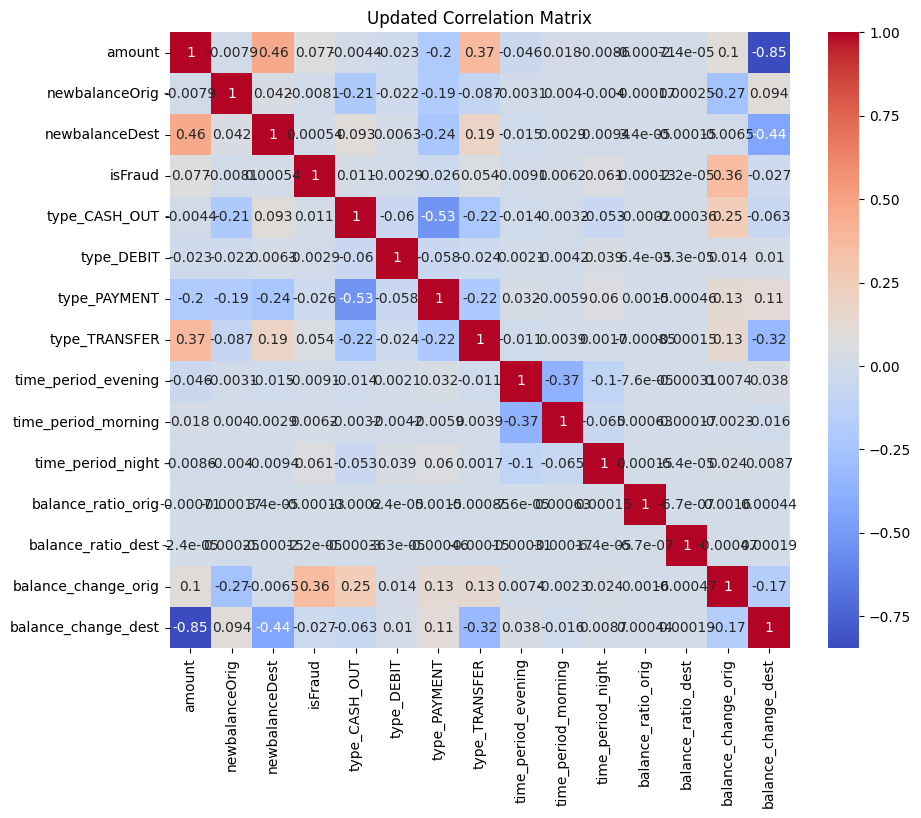

In [26]:
data['balance_change_orig'] = data['oldbalanceOrg'] - data['newbalanceOrig']
data['balance_change_dest'] = data['oldbalanceDest'] - data['newbalanceDest']


data.drop(columns=['oldbalanceOrg','oldbalanceDest'], inplace=True)


plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Updated Correlation Matrix')
plt.show()

In [27]:
# Multicollinearity check
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = data[['amount', 'balance_change_orig', 'balance_change_dest']]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

In [28]:
vif_data

,feature,VIF
0,amount,3.542462
1,balance_change_orig,1.036977
2,balance_change_dest,3.606025


In [29]:
data.head()

,amount,newbalanceOrig,newbalanceDest,isFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,time_period_evening,time_period_morning,time_period_night,balance_ratio_orig,balance_ratio_dest,balance_change_orig,balance_change_dest
0,9839.64,160296.36,0.0,0,0,0,1,0,0,0,1,1.061384,0.0,9839.64,0.0
1,1864.28,19384.72,0.0,0,0,0,1,0,0,0,1,1.096173,0.0,1864.28,0.0
2,181.00,0.00,0.0,1,0,0,0,1,0,0,1,0.000000,0.0,181.00,0.0
3,181.00,0.00,0.0,1,1,0,0,0,0,0,1,0.000000,0.0,181.00,21182.0
4,11668.14,29885.86,0.0,0,0,0,1,0,0,0,1,1.390423,0.0,11668.14,0.0


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


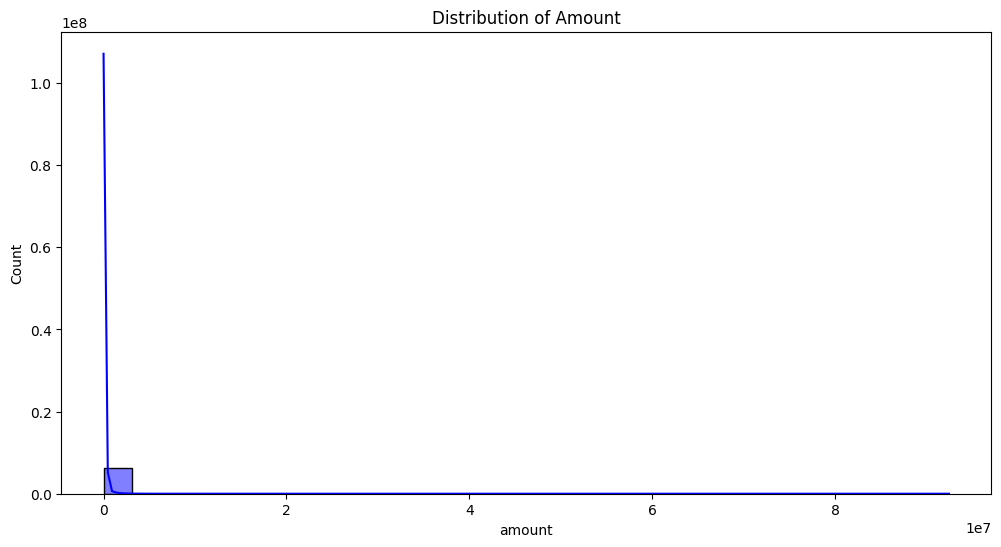

In [32]:
plt.figure(figsize=(12, 6))
sns.histplot(data['amount'], bins=30, kde=True, color='blue')
plt.title('Distribution of Amount')
plt.show()

In [33]:
#handling outliers
Q1 = data['amount'].quantile(0.25)
Q3 = data['amount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data['amount'] = np.where(data['amount'] > upper_bound, upper_bound, np.where(data['amount'] < lower_bound, lower_bound, data['amount']))

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


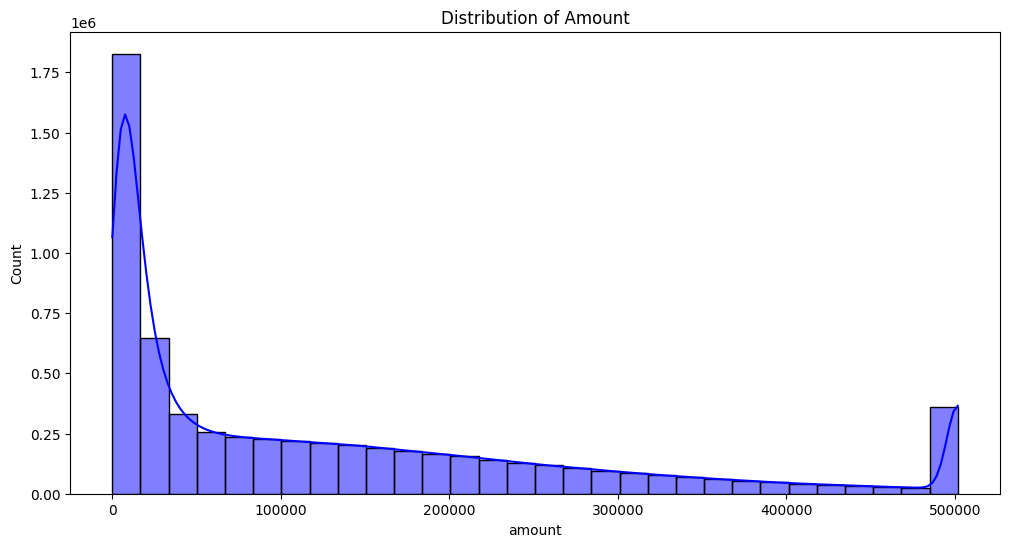

In [34]:
plt.figure(figsize=(12, 6))
sns.histplot(data['amount'], bins=30, kde=True, color='blue')
plt.title('Distribution of Amount')
plt.show()

In [35]:
data.head()

,amount,newbalanceOrig,newbalanceDest,isFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,time_period_evening,time_period_morning,time_period_night,balance_ratio_orig,balance_ratio_dest,balance_change_orig,balance_change_dest
0,9839.64,160296.36,0.0,0,0,0,1,0,0,0,1,1.061384,0.0,9839.64,0.0
1,1864.28,19384.72,0.0,0,0,0,1,0,0,0,1,1.096173,0.0,1864.28,0.0
2,181.00,0.00,0.0,1,0,0,0,1,0,0,1,0.000000,0.0,181.00,0.0
3,181.00,0.00,0.0,1,1,0,0,0,0,0,1,0.000000,0.0,181.00,21182.0
4,11668.14,29885.86,0.0,0,0,0,1,0,0,0,1,1.390423,0.0,11668.14,0.0


In [36]:
from imblearn.over_sampling import SMOTE

X = data.drop(['isFraud'], axis=1)
y = data['isFraud']




In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [38]:
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [39]:
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=15,
    max_features='sqrt',
    n_jobs=-1,
    class_weight='balanced',
    random_state=42
)
rf_model.fit(X_resampled,y_resampled)

RandomForestClassifier(class_weight='balanced', max_depth=15, n_jobs=-1,
                       random_state=42)

In [40]:
importances = rf_model.feature_importances_

# Select the top 5 important features
feature_importances = pd.Series(importances, index=X_resampled.columns)
selected_features = feature_importances.nlargest(5).index
print("Top 5 Selected Features:", selected_features)

Top 5 Selected Features: Index(['balance_change_orig', 'amount', 'newbalanceOrig', 'type_PAYMENT',
       'balance_ratio_orig'],
      dtype='object')


In [41]:
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Model Accuracy: {accuracy}")

Model Accuracy: 0.9945598930419649


In [39]:
y_test.value_counts()

isFraud
0    1906351
1       2435
Name: count, dtype: int64

In [44]:
 # Evaluate the model of random forest
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1896071   10280]
 [    104    2331]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00   1906351
           1       0.18      0.96      0.31      2435

    accuracy                           0.99   1908786
   macro avg       0.59      0.98      0.65   1908786
weighted avg       1.00      0.99      1.00   1908786



# In this problem, we will consider recall since our aim is to not let go frauders, that's why recall is considered. We have a quite good recall which shows that model is performing better for our problem.

#

Precision-Recall Tradeoff:

You can adjust the decision threshold to find a balance between precision and recall, depending on whether you want fewer false positives (higher precision) or fewer missed fraud cases (higher recall).It might improve precision at the expense of recall.

In [62]:
import xgboost as xgb


model = xgb.XGBClassifier(
    scale_pos_weight=(0.1),  
    n_estimators=100,
    max_depth=6,
    learning_rate=0.5,
    random_state=42
)


model.fit(X_resampled, y_resampled)


y_pred = model.predict(X_test)


print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(f"Model Accuracy: {accuracy_score(y_test, y_pred)}")


[[1904889    1462]
 [     96    2339]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.62      0.96      0.75      2435

    accuracy                           1.00   1908786
   macro avg       0.81      0.98      0.87   1908786
weighted avg       1.00      1.00      1.00   1908786

Model Accuracy: 0.999183774399016


The fraud detection model show a significant improvement over the previous model:

Precision: For class 0 (non-fraudulent transactions), precision remains high at 1.00.
Recall: For class 1 (fraudulent transactions), recall has increased to 0.96, indicating that a higher percentage of fraudulent transactions are now being correctly detected.
F1-score: For class 1, the F1-score has improved to 0.75, reflecting a better balance between precision and recall.
Accuracy: The overall accuracy has increased to 0.9991, indicating that the model is performing very well.
In conclusion, the performance of the fraud detection model has been significantly improved. The model is now able to detect a higher percentage of fraudulent transactions while maintaining a low false positive rate.

In [73]:
importances = model.feature_importances_

# Select the top 5 important features in XGBoost
feature_importances = pd.Series(importances, index=X_resampled.columns)
selected_features = feature_importances.nlargest(5).index
print("Top 5 Selected Features:", selected_features)

Top 5 Selected Features: Index(['balance_ratio_orig', 'type_PAYMENT', 'type_TRANSFER',
       'balance_change_orig', 'time_period_evening'],
      dtype='object')
